<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/MPLNS_30_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import preprocessing
import scipy as sp
from scipy import spatial
import numpy as np
from sklearn import cluster

In [2]:
url = "https://raw.githubusercontent.com/fedhere/MLPNS_FBianco/main/clustering/colormag_NGC2808.csv"

In [5]:
cmag = pd.read_csv(url,header=None)

In [7]:
cmag.describe()

,0,1
count,601.000000,601.000000
mean,0.657683,18.751932
std,0.410194,1.320065
min,-0.286449,15.017758
25%,0.485623,17.930904
50%,0.753550,18.925512
75%,0.911292,19.911214
max,1.540265,21.016941


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 500x500 with 0 Axes>

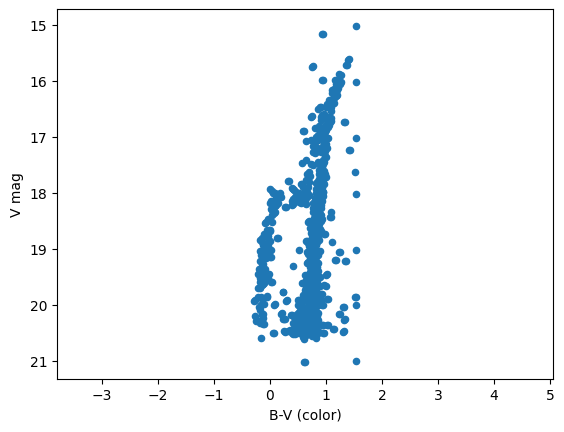

In [14]:
pl.figure(figsize=(5,5));
ax=cmag.plot(x=0,y=1,kind="scatter");
ax.set_xlabel("B-V (color)");
ax.set_ylabel("V mag");
ax.axis("equal") #mettendo stessi assi vediamo se le due feature hanno diverse scale
pl.gca().invert_yaxis(); #perché mag va al contrario

In [16]:
cmag_scaled=preprocessing.scale(cmag,axis=0)

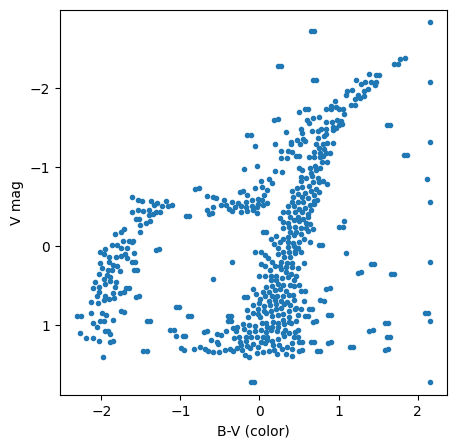

In [18]:
ax=pl.figure(figsize=(5,5)).add_subplot(111);
ax.plot(cmag_scaled[:,0],cmag_scaled[:,1],'.')
ax.set_xlabel("B-V (color)");
ax.set_ylabel("V mag");
ax.axis("equal") #mettendo stessi assi vediamo se le due feature hanno diverse scale
pl.gca().invert_yaxis(); #perché mag va al contrario

In [20]:
#usare cluster.KMeans non cluster.k_means
#si può scegliere come buttare i punti a caso
#n_init fa andare più volte l'algoritmo
#maxiter dà un limite alle iterazioni che se no posso fare con tol
model=cluster.KMeans(n_clusters=3,random_state=302)

In [21]:
model.fit(cmag_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=302)

In [22]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [23]:
model.labels_.shape

(601,)

In [25]:
#nota: quando lo faremo su una time series anche il centro sarà una serie temporale
model.cluster_centers_

array([[ 0.2930383 ,  0.77187379],
       [ 0.62251398, -1.09094667],
       [-1.61167123,  0.31291912]])

In [29]:
#l'inerzia è la somma su tutti i cluster della somma degli scarti quadratici dei punti dal centro
#è quella che kmeans minimizza, così può anche confrontare da solo diversi start di kmeans
#aumentando il numero di cluster sicuro diminuisce, ma aumenta la complessità allora uso quanto già visto per scegliere
#si sceglie il k giusto facendo il gomito su questa
model.inertia_

336.09752492000223

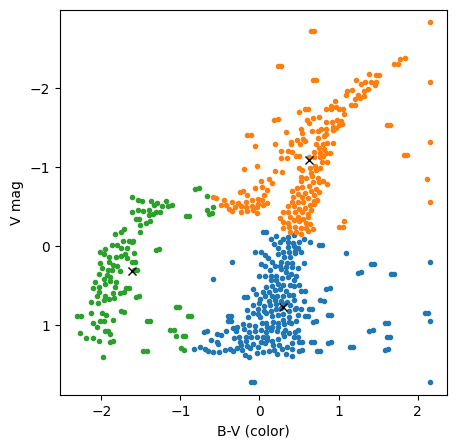

In [28]:
ax=pl.figure(figsize=(5,5)).add_subplot(111);
for i in range(3):
  ax.plot(cmag_scaled[model.labels_==i,0],cmag_scaled[model.labels_==i,1],'.')
  ax.plot(model.cluster_centers_[i,0],model.cluster_centers_[i,1],'kx')
ax.set_xlabel("B-V (color)");
ax.set_ylabel("V mag");
ax.axis("equal") #mettendo stessi assi vediamo se le due feature hanno diverse scale
pl.gca().invert_yaxis(); #perché mag va al contrario

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'inertia')

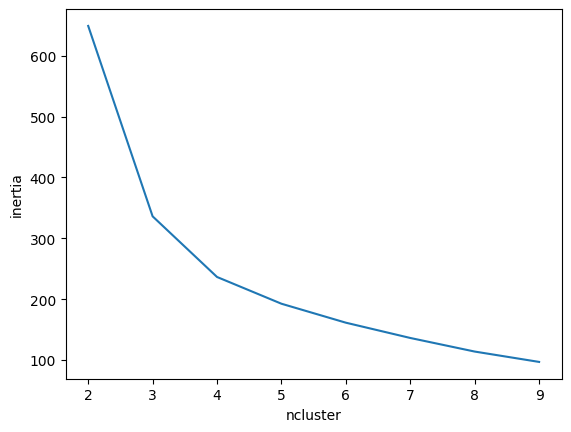

In [33]:
#i cluster sono venuti male, perché ci stiamo basando solo sulla distanza
#kmeans cerca cluster sferici
inertias = []
for nc in range(2,10):
  model=cluster.KMeans(n_clusters=nc,random_state=302).fit(cmag_scaled)
  inertias.append(model.inertia_)

pl.plot(range(2,10),inertias);
pl.xlabel("ncluster")
pl.ylabel("inertia")

In [45]:
#ci sono dei parametri di default che si basano sul pensare tutto distribuito normalmente
modeldbs = cluster.DBSCAN(eps=0.001).fit(cmag_scaled)

In [46]:
#la -1 identifica outlier
modeldbs.labels_
#un eps grande trova un cluster solo
#un eps piccolo trova solo outlier

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

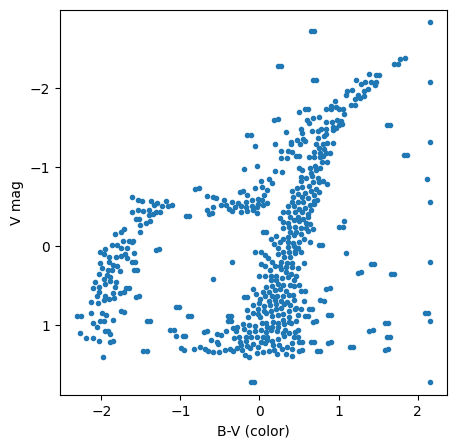

In [47]:
ax = pl.figure(figsize=(5,5)).add_subplot(111)
for i in  np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_==i,0], cmag_scaled[modeldbs.labels_==i,1], '.')

ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis();

In [ ]:
#dobbiamo conoscere la densità se no non ha senso usarlo
for e in np.arange(0.001,1,0.001):
  modeldbs = cluster.DBSCAN(eps=e,min_samples=10).fit(cmag_scaled)
  if modeldbs.labels_.max() > 0:
    print(e,modeldbs.labels_.max())
#nc è max_label+1

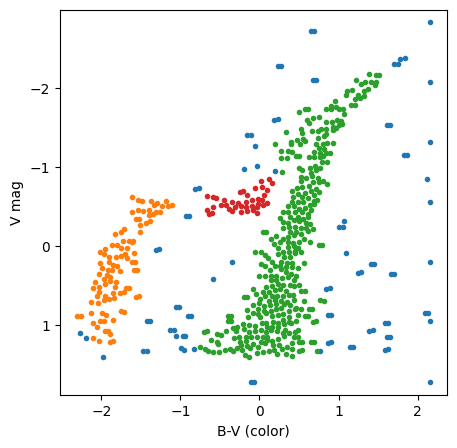

In [53]:
#mi serve anche min_pts per farlo andare davvero bene
modeldbs = cluster.DBSCAN(eps=0.2,min_samples=10).fit(cmag_scaled)
ax = pl.figure(figsize=(5,5)).add_subplot(111)
for i in  np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_==i,0], cmag_scaled[modeldbs.labels_==i,1], '.')

ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')

pl.gca().invert_yaxis();
#non riusciamo comunque a fare le cose davvero per bene